# Abstract

**Author:** [Charles Tapley Hoyt](https://github.com/cthoyt)

**Estimated Run Time:** 10 minutes

This notebooks presents the results of 8 months of recuration. The Alzheimer's disease knowledge assembly went from 8030 warnings to 2703 with the help of Daniel. The Parkinson's disease knowledge assembly went from 1171 warnings to 706 with the help of Daniel and Reagon. The overall contributions to the BMS are outlined below

In [1]:
import os
import time

from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import pybel
import pybel_tools

from git import Repo
from pybel_tools.utils import barh, barv

In [2]:
time.asctime()

'Tue Aug 22 23:35:36 2017'

In [3]:
pybel.__version__

'0.7.3-dev'

In [4]:
pybel_tools.__version__

'0.2.2-dev'

In [5]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [6]:
pybel_tools.utils.enable_cool_mode()

The original BEL knowledge assembleis are retrieved from BMS commit c380b269ff4853966fac755a277249d0cec588b5.

In [7]:
old_storage = os.path.join(os.path.expanduser('~'), 'Desktop')

ad_old_path = os.path.join(old_storage, 'alzheimers_aetionomy.bel')
pd_old_path = os.path.join(old_storage, 'parkinsons_aetionomy.bel')

The most current BEL knowledge assemblies are retrieved directly from the HEAD of the BMS repository

In [8]:
ad_new_path = os.path.join(os.environ['BMS_BASE'], 'aetionomy', 'alzheimers', 'alzheimers.bel')
pd_new_path = os.path.join(os.environ['BMS_BASE'], 'aetionomy', 'parkinsons', 'parkinsons.bel')

In [9]:
manager = pybel.manager.CacheManager()

In [10]:
%%time
ad_old = pybel.from_path(ad_old_path, allow_definition_failures=True, allow_redefinition=True)

CPU times: user 4min 10s, sys: 5.85 s, total: 4min 16s
Wall time: 4min 24s


In [11]:
%%time
pd_old = pybel.from_path(pd_old_path, allow_definition_failures=True, allow_redefinition=True)

CPU times: user 1min 26s, sys: 8.19 s, total: 1min 34s
Wall time: 1min 42s


In [12]:
%%time
ad_new = pybel.from_path(ad_new_path)

CPU times: user 2min 18s, sys: 1min 49s, total: 4min 7s
Wall time: 4min 43s


In [13]:
%%time
pd_new = pybel.from_path(pd_new_path)

CPU times: user 36.1 s, sys: 2.11 s, total: 38.2 s
Wall time: 42.3 s


In [14]:
graphs = {
    'AD v3.0': ad_old, 
    'PD v1.1': pd_old,
    'AD Current': ad_new,
    'PD Current': pd_new
}

summaries = {
    name: pybel_tools.summary.count_error_types(graph)
    for name, graph in graphs.items()    
}

In [15]:
df = pd.DataFrame(summaries)
df[df.isnull()] = 0
df = df.astype(int)

The following table presents the total number of warnings in each knowledge assembly.

In [16]:
df.sum()

AD Current    2703
AD v3.0       8030
PD Current     706
PD v1.1       1171
dtype: int64

The following table presents the warnings in each knowledge assembly grouped by type.

In [40]:
df.to_csv(os.path.join(os.path.expanduser('~'), 'Desktop', 'recuration_summary.csv'))
df

,AD Current,AD v3.0,PD Current,PD v1.1
IllegalAnnotationValueWarning,264,209,0,9
InvalidFunctionSemantic,46,189,1,30
InvalidPubMedIdentifierWarning,4,67,0,0
MalformedTranslocationWarning,75,77,0,1
MissingAnnotationKeyWarning,320,219,29,36
MissingCitationException,20,1074,0,0
MissingNamespaceNameWarning,1035,3564,103,242
MissingNamespaceRegexWarning,0,0,2,0
MissingSupportWarning,25,203,0,18
NakedNameWarning,570,1933,357,534


The following chart makes a side-by-side comparison of the errors in each knowledge assembly from its old to new version.

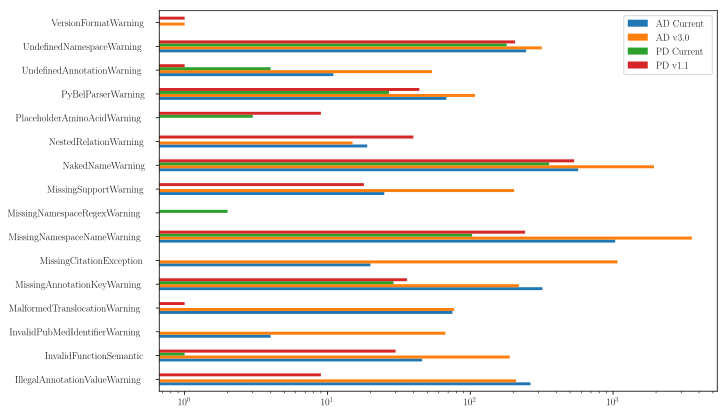

In [43]:
df.plot.barh(log=True, figsize=(10,7))
plt.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'recuration_bars.pdf'), bbox_inches='tight')
plt.show()

The following charts list all material contributions to the BMS since its creation.

In [19]:
repo = Repo(os.environ['BMS_BASE'])

In [38]:
commit_counter = Counter(commit.author.name for commit in repo.iter_commits())

remapping = {
    'Dejan Đukić': 'Dejan Dukic',
    'Charlie Hoyt': 'Charles Tapley Hoyt',
    'norafilep': 'Nora Filep',
    'ddomingofernandez': 'Daniel Domingo Fernandez',
    'Daniel':  'Daniel Domingo Fernandez',
    'ddomingof':  'Daniel Domingo Fernandez',
    'mohammad.asif.emon': 'asifemon',
    'akodamullil': 'alpha.tom.kodamullil',
}

clean_commit_counter = Counter()
for k,v in commit_counter.items():
    
    if k in remapping:
        clean_commit_counter[remapping[k]] += v
    else:
        clean_commit_counter[k] += v

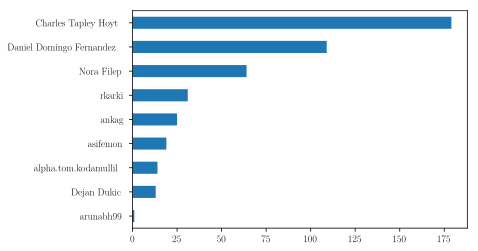

In [44]:
commit_df = pd.Series(clean_commit_counter).sort_values()
commit_df.plot.barh()
plt.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'bms_commits.pdf'), bbox_inches='tight')
plt.show()